In [ ]:
pip install cx_Oracle

In [1]:
import cx_Oracle
import pandas as pd
import os
import openpyxl
import datetime
import numpy as np


dsn_tns = cx_Oracle.makedsn('xx.xx.xx.xx', 'xxxx',
                            service_name='xx')

conn = cx_Oracle.connect(user=r'xxx', password='xxxx',
                         dsn=dsn_tns)

main_directory = r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY'  # you can select a root for this project which contains all input and outputs
os.chdir(main_directory)

In [6]:
c = conn.cursor()
sql_IP = '''
   select mss.sdate,to_char(mss.sdate, 'yyyy/mm/dd') pdate, NVL(mss.Seizure_ER,0) + NVL(sbc.VoLTE_ER,0) as Seizure_ER
    from(
    select trunc(a.sdate,'DD') sdate,to_char(a.sdate, 'yyyy/mm/dd'),
    (sum(id_84163237)+sum(id_84163338)) Seizure_ER


    from table1 a,table2 b

    where  (a.sdate >= trunc(sysdate,'DD') - 50 and a.sdate < trunc(sysdate,'DD'))
              and a.office=b.office and a.ne=b.ne and a.sdate=b.sdate  

    GROUP BY trunc(a.sdate,'DD'),to_char(a.sdate, 'yyyy/mm/dd')
    ) mss
    left join
    (
    select trunc(s.sdate,'DD') sdate, sum(id_1912981110) + sum(id_1912981111) as VoLTE_ER
    from table3 s
    where  (s.sdate >= trunc(sysdate,'DD') - 50 and s.sdate < trunc(sysdate,'DD'))
    GROUP BY trunc(s.sdate,'DD')

    )sbc
    on sbc.sdate = mss.sdate
    order by mss.sdate
'''
c.execute(sql_IP)
Erlang_tot = pd.DataFrame(c.fetchall())
Erlang_tot.columns = [i[0] for i in c.description]
#Erlang_tot.to_csv(r'D:\Shima\KPI Automation\total_Er.csv')

In [9]:
c = conn.cursor()
sql_new = '''
    SELECT sdate, Tech,
   
    CASE WHEN SUM(Seizure_Times) > 0 THEN SUM(Seizure_ER) * 3600 / SUM(Seizure_Times) ELSE 0 END AS MHT_Seizure,
    
    SUM(Seizure_ER) AS Seizure_ER,


    SUM(IC_ANN) AS IC_ANN,
    SUM(OG_ANN) AS OG_ANN,
    SUM(IC_ER_ANN) AS IC_ER_ANN,
    SUM(OG_ER_ANN) AS OG_ER_ANN,
    CASE WHEN SUM(IC_ANN) > 0 THEN SUM(IC_ER_ANN) * 3600 / SUM(IC_ANN) ELSE 0 END AS "MHT IC_ANN",
    CASE WHEN SUM(OG_ANN) > 0 THEN SUM(OG_ER_ANN) * 3600 / SUM(OG_ANN) ELSE 0 END AS "MHT OG_ANN"
    
    FROM (
        SELECT TRUNC(a.sdate, 'DD') AS sdate, a.office,

        (SUM(id_84163237) + SUM(id_84163338)) AS Seizure_ER,
        SUM(id_84163210) + SUM(id_84163301) AS Seizure_Times,
 
       
        SUM(id_84163237) AS "IC Seizure Traffic",

        SUM(id_84163300) AS "OG Seizure Attempts",

        SUM(id_84163338) AS "OG Seizure Traffic",

        SUM(id_84163210) - SUM(id_84163214) AS IC_ANN,
        SUM(id_84163301) - SUM(id_84163303) AS OG_ANN,
        SUM(id_84163237) - SUM(id_84163241) AS IC_ER_ANN,
        SUM(id_84163338) - SUM(id_84163342) AS OG_ER_ANN,
        CASE 
            WHEN a.office LIKE '%BSC%' THEN '2G'
            WHEN a.office LIKE '%RNC%' THEN '3G'
            ELSE 'unknown'
        END AS Tech
        FROM huawei6000_gsm.mss83888115h60 a, huawei6000_gsm.mss83888114h60 b
        where  (a.sdate >= trunc(sysdate,'DD') - 50 and a.sdate < trunc(sysdate,'DD'))
        AND a.office = b.office
        AND a.ne = b.ne
        AND a.sdate = b.sdate
        AND a.office = b.office
        AND a.ne = b.ne
        AND a.sdate = b.sdate
        GROUP BY TRUNC(a.sdate, 'DD'), a.office
    )
    GROUP BY sdate, Tech
    ORDER BY sdate, Tech
'''
c.execute(sql_new)
Erlang_tot = pd.DataFrame(c.fetchall())
Erlang_tot.columns = [i[0] for i in c.description]

Erlang_tot.to_excel('Erlang_tot.xlsx', index=False)


In [10]:
Erlang_tot

,SDATE,TECH,MHT_SEIZURE,SEIZURE_ER,IC_ANN,OG_ANN,IC_ER_ANN,OG_ER_ANN,MHT IC_ANN,MHT OG_ANN
0,2023-05-26,2G,74.149956,1276161.24,19064332,9262061,185311.94,109650.21,34.993253,42.619106
1,2023-05-26,3G,86.260677,5433039.10,54807197,36633240,589911.52,419875.80,38.748223,41.261785
2,2023-05-27,2G,76.015334,1575808.33,21924541,10849907,215765.21,131443.87,35.428553,43.613086
3,2023-05-27,3G,88.616890,7372662.96,70380082,45589719,760664.17,535793.36,38.908608,42.309015
4,2023-05-28,2G,76.286057,1545682.90,21426827,10661987,211124.38,128960.34,35.471783,43.543218
...,...,...,...,...,...,...,...,...,...,...
95,2023-07-12,3G,82.864466,7008210.74,75581995,45601787,772874.19,535827.83,36.812300,42.300539
96,2023-07-13,2G,71.281031,1428599.42,21334578,10699322,211444.92,128641.46,35.679249,43.283982
97,2023-07-13,3G,81.423527,6638912.34,68683928,44975889,755058.92,531206.41,39.575665,42.519295
98,2023-07-14,2G,72.148843,1218472.64,18931848,9244965,183482.64,108306.87,34.890281,42.174820


In [11]:
Erlang_tot_2G=Erlang_tot[(Erlang_tot['TECH']=='2G')]
Erlang_tot_2G=Erlang_tot_2G[['SDATE','SEIZURE_ER']]
Erlang_tot_3G=Erlang_tot[Erlang_tot['TECH']=='3G']
Erlang_tot_3G=Erlang_tot_3G[['SDATE','SEIZURE_ER']]
Erlang_tot_3G['SEIZURE_ER_3G'] =Erlang_tot_3G[['SEIZURE_ER']]
Erlang_tot_2G['SEIZURE_ER_2G'] =Erlang_tot_2G[['SEIZURE_ER']]


In [12]:
Erlang_tot_2G=Erlang_tot_2G.drop(columns=['SEIZURE_ER'])
Erlang_tot_3G=Erlang_tot_3G.drop(columns=['SEIZURE_ER'])


In [13]:
Erlang_tot_2G=Erlang_tot_2G.set_index('SDATE')


In [14]:
Erlang_tot_3G=Erlang_tot_3G.set_index('SDATE')

In [15]:
Legecy_Network=pd.concat([Erlang_tot_3G, Erlang_tot_2G], axis=1)


In [16]:
Legecy_Network

,SEIZURE_ER_3G,SEIZURE_ER_2G
SDATE,,
2023-05-26,5433039.10,1276161.24
2023-05-27,7372662.96,1575808.33
2023-05-28,7217865.24,1545682.90
2023-05-29,7247336.28,1544624.13
2023-05-30,7218592.61,1544096.06
2023-05-31,7104198.12,1525036.33
2023-06-01,6803597.01,1480280.88
2023-06-02,5368770.64,1245506.97
2023-06-03,6964163.69,1514082.31


In [17]:
c = conn.cursor()
sql_IP = '''
    select sbc.sdate,to_char(sbc.sdate, 'yyyy/mm/dd', 'nls_calendar=persian') pdate, NVL(sbc.VoLTE_ER,0) as VoLTE_ER
    from(
    select trunc(s.sdate,'DD') sdate, sum(id_1912981110) + sum(id_1912981111) as VoLTE_ER
    from table2 s
    where  (s.sdate >= trunc(sysdate,'DD') - 50 and s.sdate < trunc(sysdate,'DD'))

    GROUP BY trunc(s.sdate,'DD')

    )sbc
    
    order by sbc.sdate
'''
c.execute(sql_IP)
VoLTE = pd.DataFrame(c.fetchall())
VoLTE.columns = [i[0] for i in c.description]
VoLTE.to_excel('Erlang.xlsx', index=False)
VoLTE=VoLTE.set_index('SDATE')


In [18]:
VoLTE

,PDATE,VOLTE_ER
SDATE,,
2023-05-26,1402/03/05,2190056.020
2023-05-27,1402/03/06,3017669.866
2023-05-28,1402/03/07,2953419.745
2023-05-29,1402/03/08,2956050.264
2023-05-30,1402/03/09,2940191.757
2023-05-31,1402/03/10,2878398.667
2023-06-01,1402/03/11,2732332.378
2023-06-02,1402/03/12,2160827.753
2023-06-03,1402/03/13,2820892.932


In [19]:
e=pd.concat([VoLTE, Legecy_Network,], axis=1)
e['2G3G_Seizure']=Legecy_Network['SEIZURE_ER_3G']+Legecy_Network['SEIZURE_ER_2G']
e['tot_Seizure']=e['SEIZURE_ER_3G']+e['SEIZURE_ER_2G']+e['VOLTE_ER']
e['VoLTE_percent']=(e['VOLTE_ER'] / e['tot_Seizure'])*100
e['3G_percent']=(e['SEIZURE_ER_3G'] / e['tot_Seizure'])*100
e['2G_percent']=(e['SEIZURE_ER_2G'] / e['tot_Seizure'])*100


In [23]:
3G_percent

SyntaxError: invalid syntax (Temp/ipykernel_17384/1850408287.py, line 1)

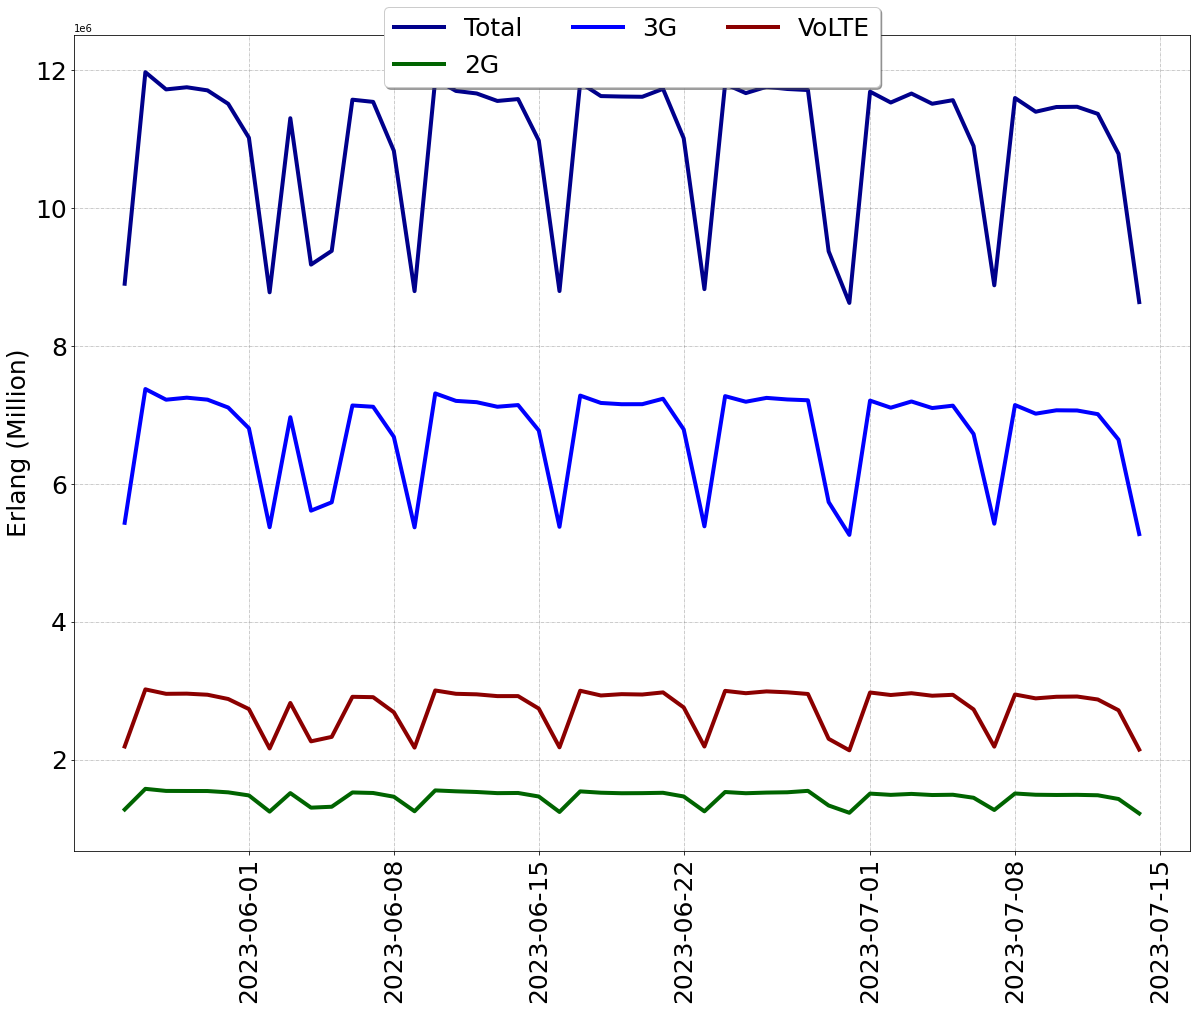

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image

plt.figure(1,figsize=(20,15))
ax1=plt.plot(e.index, e['tot_Seizure'],c='darkblue',linewidth=4,label='Total')
ax2=plt.plot(e.index, e['SEIZURE_ER_2G'],c='darkgreen',linewidth=4,label='2G')
ax3=plt.plot(e.index, e['SEIZURE_ER_3G'],c='blue',linewidth=4,label='3G')        

ax2=plt.plot(e.index, e['VOLTE_ER'],c='darkred',linewidth=4,label='VoLTE')
plt.grid(b = True, color ='grey',
                   linestyle ='-.', linewidth = 0.5,
                   alpha = 0.8)
        
plt.ylabel('Erlang (Million)',fontsize=25)
#plt.xlabel('Date',fontsize=40)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True,fontsize=25)
plt.ticklabel_format(axis="y", style='sci',scilimits=(6,6))
plt.savefig(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\Erlang_Share.png',dpi=300, bbox_inches = "tight")


plt.show()

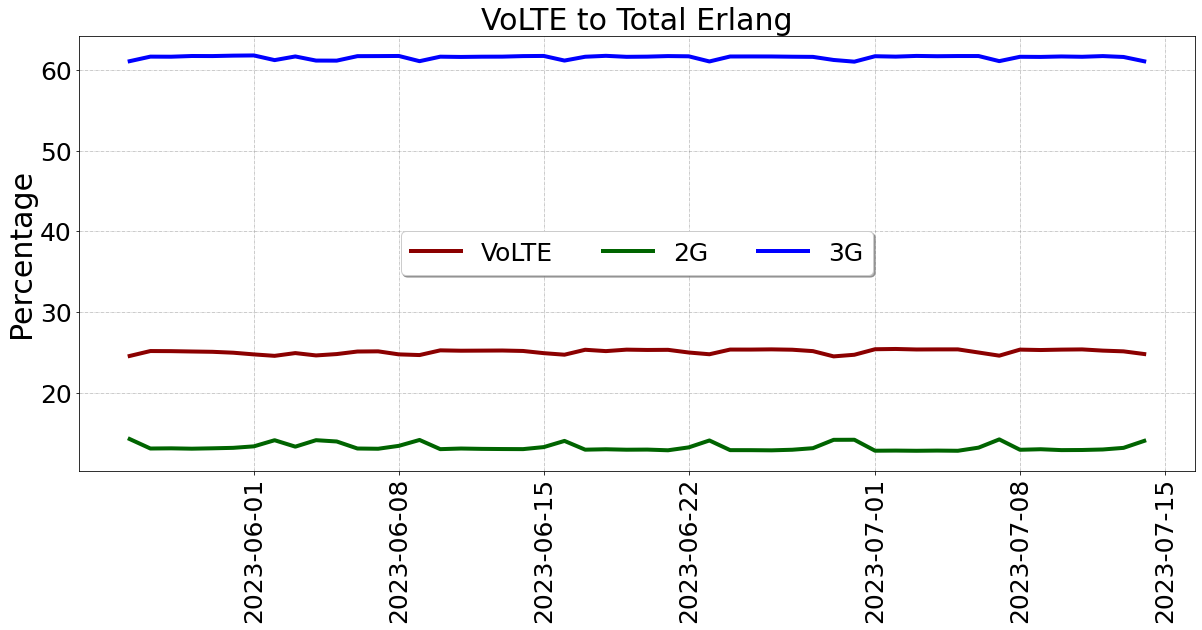

In [24]:
fig=plt.figure(1,figsize=(20,8))
plt.plot(e.index, e['VoLTE_percent'],c='darkred',linewidth=4,label='VoLTE')
plt.plot(e.index, e['2G_percent'],c='darkgreen',linewidth=4,label='2G')
plt.plot(e.index, e['3G_percent'],c='blue',linewidth=4,label='3G')
plt.xticks(fontsize=25,rotation=90)
plt.grid(b = True, color ='grey',
                   linestyle ='-.', linewidth = 0.5,
                   alpha = 0.8)
plt.title('VoLTE to Total Erlang',fontsize=30)        
plt.ylabel('Percentage',fontsize=30)
#plt.xlabel('Date',fontsize=40)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc='center', bbox_to_anchor=(0.5, .5),
          ncol=3, fancybox=True, shadow=True,fontsize=25)
plt.savefig(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\Percentage.png',dpi=300, bbox_inches = "tight")

plt.show()

In [29]:
from datetime import datetime, timedelta
presentday = e.last_valid_index()
yesterday = presentday - timedelta(1)
yesterdayval=round(e['VoLTE_percent'].loc[[yesterday]].item(), 2)
presentdayval=round(e['VoLTE_percent'].loc[[presentday]].item(), 2)
dif1=round(presentdayval-yesterdayval, 3)
print(f'The VoLTE Erlang has reached to {presentdayval}% of total 2G3G4G Erlang by yesterday')
dif1
if dif1 >= 0:
    print(f'the last captured day is raised by {dif1}% in comparison to a day before')
else :
    print(f'the last captured day is decreased by {dif1}% in comparison to a day before')


The VoLTE Erlang has reached to 24.85% of total 2G3G4G Erlang by yesterday
the last captured day is decreased by -0.33% in comparison to a day before


In [30]:
from datetime import datetime, timedelta
presentday = e.last_valid_index()
yesterday = presentday - timedelta(1)
yesterdayval3G=round(e['3G_percent'].loc[[yesterday]].item(), 2)
presentdayval3G=round(e['3G_percent'].loc[[presentday]].item(), 2)
dif1=round(presentdayval-yesterdayval, 3)
print(f'The 3G Erlang has reached to {presentdayval}% of total 2G3G4G Erlang by yesterday')
dif1
if dif1 >= 0:
    print(f'the last captured day is raised by {dif1}% in comparison to a day before')
else :
    print(f'the last captured day is decreased by {dif1}% in comparison to a day before')

The 3G Erlang has reached to 24.85% of total 2G3G4G Erlang by yesterday
the last captured day is decreased by -0.33% in comparison to a day before


In [31]:
from datetime import datetime, timedelta
presentday = e.last_valid_index()
yesterday = presentday - timedelta(1)
yesterdayval2G=round(e['2G_percent'].loc[[yesterday]].item(), 2)
presentdayval2G=round(e['2G_percent'].loc[[presentday]].item(), 2)
dif1=round(presentdayval-yesterdayval, 3)
print(f'The 2G Erlang has reached to {presentdayval}% of total 2G3G4G Erlang by yesterday')
dif1
if dif1 >= 0:
    print(f'the last captured day is raised by {dif1}% in comparison to a day before')
else :
    print(f'the last captured day is decreased by {dif1}% in comparison to a day before')

The 2G Erlang has reached to 24.85% of total 2G3G4G Erlang by yesterday
the last captured day is decreased by -0.33% in comparison to a day before


In [32]:
import datetime

# Calculate present day and yesterday
presentday = e.last_valid_index()
yesterday = presentday - datetime.timedelta(days=1)

# Get maximum VoLTE Erlang value and corresponding date
maxval = e['VoLTE_percent'].max()
maxval_date = e[e['VoLTE_percent'] == maxval].index.tolist()

# Print maximum VoLTE Erlang information
print(f"The Maximum VoLTE Erlang has reached {round(maxval, 2)}% on {maxval_date}")

# Function to calculate and print Erlang information for a given column
def print_erlang_info(column_name):
    yesterday_val = round(e[column_name].loc[[yesterday]].item(), 2)
    presentday_val = round(e[column_name].loc[[presentday]].item(), 2)
    diff = round(presentday_val - yesterday_val, 3)
    print(f"The {column_name} Erlang has reached {presentday_val}% of total 2G3G4G Erlang by yesterday")
    print(diff)
    if diff >= 0:
        print(f"The last captured day has increased by {diff}% compared to the previous day")
    else:
        print(f"The last captured day has decreased by {abs(diff)}% compared to the previous day")

# Print Erlang information for 3G
print_erlang_info('3G_percent')

# Print Erlang information for 2G
print_erlang_info('2G_percent')


The Maximum VoLTE Erlang has reached 25.47% on [Timestamp('2023-07-02 00:00:00')]
The 3G_percent Erlang has reached 61.04% of total 2G3G4G Erlang by yesterday
-0.53
The last captured day has decreased by 0.53% compared to the previous day
The 2G_percent Erlang has reached 14.11% of total 2G3G4G Erlang by yesterday
0.86
The last captured day has increased by 0.86% compared to the previous day


In [33]:
def print_max_erlang_info(column_name):
    max_val = e[column_name].max()
    max_val_dates = e[e[column_name] == max_val].index.tolist()
    print(f"The Maximum {column_name} Erlang has reached {round(max_val, 2)}% on {max_val_dates}")

# Print maximum VoLTE Erlang information
print_max_erlang_info('VoLTE_percent')

# Print maximum 3G Erlang information
print_max_erlang_info('3G_percent')

# Print maximum 2G Erlang information
print_max_erlang_info('2G_percent')


The Maximum VoLTE_percent Erlang has reached 25.47% on [Timestamp('2023-07-02 00:00:00')]
The Maximum 3G_percent Erlang has reached 61.76% on [Timestamp('2023-06-01 00:00:00')]
The Maximum 2G_percent Erlang has reached 14.34% on [Timestamp('2023-05-26 00:00:00')]


In [ ]:
e.to_excel(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\erlang.xlsx')

In [34]:
c = conn.cursor()
sql_scscf_IMPI =    '''
    SELECT   trunc(sdate,'DD') SDATE , SUM(ID_335664499) "unregistered IMPI on S-CSCF", SUM(ID_335664498) "registered IMPI on S-CSCF"
    FROM HUAWEI6000_GSM.CSC335555330H60
   where  (sdate >= trunc(sysdate,'DD') - 1 and sdate < trunc(sysdate,'DD'))
      
    GROUP BY SDATE
    order by SDATE
     '''
c.execute(sql_scscf_IMPI)
sql_scscf_IMPI = pd.DataFrame(c.fetchall())
sql_scscf_IMPI.columns = [i[0] for i in c.description]
sql_scscf_IMPI['SDATE'] = pd.to_datetime(sql_scscf_IMPI['SDATE'])
sql_scscf_IMPI=sql_scscf_IMPI.set_index('SDATE')
#sql_scscf_IMPI.to_excel(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\sql_scscf_IMPI.xlsx')
sql_scscf_IMPI

,unregistered IMPI on S-CSCF,registered IMPI on S-CSCF
SDATE,,
2023-07-14,2933359,12952245
2023-07-14,2574709,13189159
2023-07-14,2935952,12560750
2023-07-14,2936382,12454983
2023-07-14,2936269,12404224
2023-07-14,2935217,12401605
2023-07-14,2931453,12438024
2023-07-14,2919958,12528376
2023-07-14,2896667,12662276


In [35]:
unreg=round(sql_scscf_IMPI['unregistered IMPI on S-CSCF'].sum()/24,0)
reg=round(sql_scscf_IMPI['registered IMPI on S-CSCF'].sum()/24,0)
totalsubs=unreg+reg
totalsubs

15724397.0

In [36]:
str(f"{totalsubs:,.0f}")

'15,724,397'

In [37]:
reg

12953028.0

In [38]:
unreg

2771369.0

In [39]:
c = conn.cursor()
sql_scscf_IMPI =    '''
    SELECT   trunc(s.sdate,'DD') SDATE , sum(ID_335664499) "unregistered IMPI on S-CSCF", sum(ID_335664498) "registered IMPI on S-CSCF"
    FROM HUAWEI6000_GSM.CSC335555330H60 s
   where  (s.sdate >= trunc(sysdate,'DD') - 50 and s.sdate < trunc(sysdate,'DD'))
    GROUP BY trunc(s.sdate,'DD')
    order by SDATE
     '''
c.execute(sql_scscf_IMPI)
sql_scscf_IMPI = pd.DataFrame(c.fetchall())
sql_scscf_IMPI.columns = [i[0] for i in c.description]
sql_scscf_IMPI['SDATE'] = pd.to_datetime(sql_scscf_IMPI['SDATE'])
sql_scscf_IMPI=sql_scscf_IMPI.set_index('SDATE')
#sql_scscf_IMPI.to_excel(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\sql_scscf_IMPI.xlsx')


In [40]:
sql_scscf_IMPI['unregistered IMPI on S-CSCF']=sql_scscf_IMPI['unregistered IMPI on S-CSCF']/24
sql_scscf_IMPI['registered IMPI on S-CSCF']=sql_scscf_IMPI['registered IMPI on S-CSCF']/24
sql_scscf_IMPI['total sub']=sql_scscf_IMPI['registered IMPI on S-CSCF']+sql_scscf_IMPI['unregistered IMPI on S-CSCF']


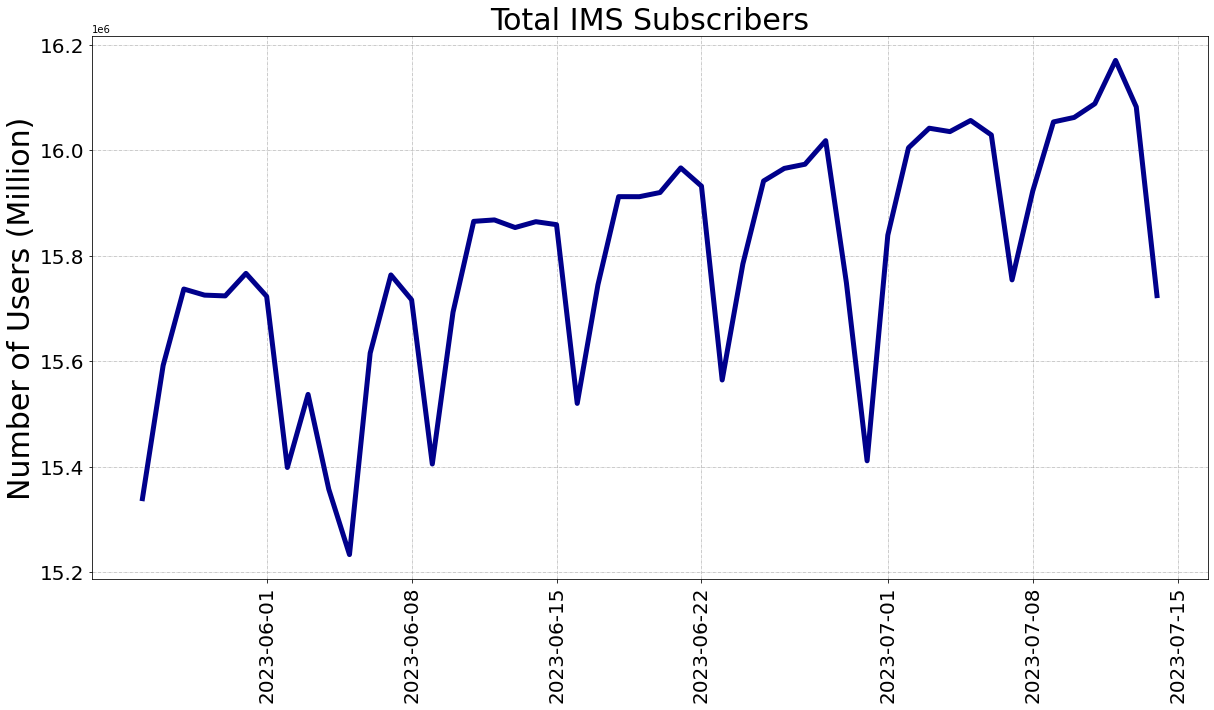

In [41]:
fig=plt.figure(1,figsize=(20,10))
plt.plot(sql_scscf_IMPI.index, sql_scscf_IMPI['total sub'],c='darkblue',linewidth=5)
plt.ticklabel_format(axis="y", style='sci',scilimits=(6,6))
plt.xticks(fontsize=30,rotation=90)
plt.grid(b = True, color ='grey',
                   linestyle ='-.', linewidth = 0.5,
                   alpha = 0.8)
plt.title('Total IMS Subscribers',fontsize=30)        
plt.ylabel('Number of Users (Million)',fontsize=30)
#plt.xlabel('Date',fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\totalsub.png',dpi=300, bbox_inches = "tight")
#plt.savefig(r'C:\Users\shima.am\Documents\Python Scripts\python\KPI Automation-SQL\totalsub.png',dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
#sql_scscf_IMPI=sql_scscf_IMPI.drop('2023-02-16')

In [42]:
c = conn.cursor()
sql_HH_Er =    '''
    select  trunc(sdate,'DD')sdate,
           ne,
           SUM(ID_478154842 + ID_478154836) "Seizure Traffic",
           SUM(ID_478155388) "Answered Traffic"

    -- ID_478154836 "Traffic of ATS Seized MO Sessions",
    -- ID_478154842 "Traffic of ATS Seized MT Sessions",
    ---id_47815483  "Traffic of ATS Answered MO Sessions" ,
    ---id_478154844 "Traffic of ATS Answered MT Sessions"
      from huawei6000_gsm.ats477106089h60


     where sdate >= sysdate-50 and sdate < sysdate
      group by sdate, ne
     order by sdate
     '''
c.execute(sql_HH_Er)
HH_Er = pd.DataFrame(c.fetchall())
HH_Er.columns = [i[0] for i in c.description]
HH_Er['SDATE'] = pd.to_datetime(HH_Er['SDATE'])
#HH_Er=HH_Er.set_index('SDATE')
#pd.PL_TP.to_excell(r'C:\Users\shima.am\Documents\Python Scripts\python\KPI Automation-SQL\in-output\PL_TP_output')
NE_Er=HH_Er.groupby(['NE','SDATE'])
table = pd.pivot_table(HH_Er, values =['Seizure Traffic','Answered Traffic'], index ='SDATE',
                         columns =['NE'], aggfunc = np.sum)
table.columns = ['_'.join(str(s).strip() for s in col if s) for col in table.columns]
table['total answered traffic']=table.iloc[:,:3].astype(float).sum(1)
table['total seizure traffic']=table.iloc[:,[3,4,5]].astype(float).sum(1)
table['seizure_ES_rate']=100*table['Seizure Traffic_ESTASH01']/table['total seizure traffic']
table['seizure_TA_rate']=100*table['Seizure Traffic_TATASH01']/table['total seizure traffic']
table['seizure_TW_rate']=100*table['Seizure Traffic_TWTASH01']/table['total seizure traffic']

table['answered_ES_rate']=100*table['Answered Traffic_ESTASH01']/table['total answered traffic']
table['answered_TA_rate']=100*table['Answered Traffic_TATASH01']/table['total answered traffic']
table['answered_TW_rate']=100*table['Answered Traffic_TWTASH01']/table['total answered traffic']

table['seizure_ES_rate']=round(table['seizure_ES_rate'],2)
table['seizure_TA_rate']=round(table['seizure_TA_rate'],2)
table['seizure_TW_rate']=round(table['seizure_TW_rate'],2)
table['answered_ES_rate']=round(table['answered_ES_rate'],2)
table['answered_TA_rate']=round(table['answered_TA_rate'],2)
table['answered_TW_rate']=round(table['answered_TW_rate'],2)


In [ ]:
pip install squarify

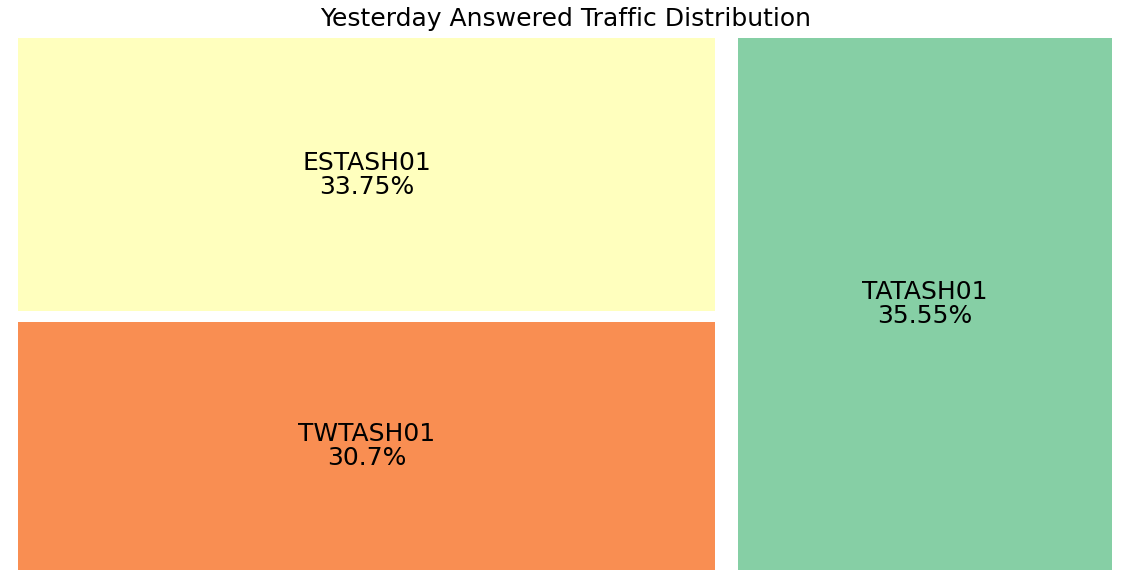

In [43]:

import seaborn as sb
import squarify
import matplotlib.pyplot as plt
#data = table.loc['2023-07-08'][['answered_TW_rate','answered_TA_rate','answered_ES_rate']].sort_values()
from datetime import datetime, timedelta

presentday = datetime.now().date()  # Get the current system date
yesterday = presentday - timedelta(days=1)  # Get the day before the current date

data = table.loc[yesterday.strftime('%Y-%m-%d'), ['answered_TW_rate', 'answered_TA_rate', 'answered_ES_rate']].sort_values()

NE_old=data.sort_values().index
NE_new={
    'answered_TW_rate':'TWTASH01',
    'answered_TA_rate':'TATASH01',
    'answered_ES_rate':'ESTASH01'
}
NE = [NE_new.get(value, value) for value in NE_old]
#NE = [data.idxmin(axis=0),'TATASH01',data.idxmax(axis=0)]
plt.figure(figsize=(20, 10))
ax= squarify.plot(data, label=NE, value = [f'{x}%' for x in data] ,pad=2,color=sb.color_palette("Spectral", 
                                     len(data)),text_kwargs={'fontsize': 25})
ax.set_title("Yesterday Answered Traffic Distribution", fontsize=25)
plt.axis("off")
plt.savefig(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\Answered Traffic Distribution.jpg')


In [ ]:
data.sort_values().index

# Send Email to stakeholders 

In [44]:
import win32com.client as win32
from datetime import datetime, timedelta
import os
outlook = win32.Dispatch('outlook.application')
mail = outlook.CreateItem(0)
yesterday = datetime.today() - timedelta(1)
yesterday =yesterday.strftime ("%m-%d-%Y")
mail.Subject = '[Performance Dashboard]:VoLTE report ' + datetime.now().strftime('%#d %b %Y')
mail.To = "xx"
attachment = mail.Attachments.Add(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\Erlang_Share.png')
attachment.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "Share_img")
attachment1 = mail.Attachments.Add(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\Percentage.png')
attachment1.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "Percentage_img")
attachment2 = mail.Attachments.Add(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\totalsub.png')
attachment2.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "totalsub_img")
attachment3 = mail.Attachments.Add(r'C:\Users\parisa.kh\Documents\Python Scripts\VoLTE - PER TECHNOLOGY\Answered Traffic Distribution.jpg')
attachment3.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "traffic_img")
html_table = e.to_html()
mail.HTMLBody = r"""
<center>**This Email is generated Automatically**</center><br><br>
<b>Dear All</b>,<br><br>
Please be informed that: <br><br>
The VoLTE Erlang has reached """ +  str(round(presentdayval,2)) + """% of the total Erlang,
by """+str(yesterday)+ """. <br><br>
The 2G Erlang has reached """ +  str(round(presentdayval2G,2)) + """% of the total Erlang,
by """+str(yesterday)+ """. <br><br>
The 3G Erlang has reached """ +  str(round(presentdayval3G,2)) + """% of the total Erlang,
by """+str(yesterday)+ """. <br><br>
The Number of <b>Registered IMPIs</b> on the S-CSCF has reached """+  str(f"{reg:,.0f}") +""" <br>
And the Number of <b>Unregistered IMPIs</b> on the S-CSCF has reached """+  str(f"{unreg:,.0f}") +"""<br>
So the total Number of <b>IMS subscribers</b> were """+  str(f"{totalsubs:,.0f}") +""" by """+str(yesterday)+ """. <br><br>
<br><br>
<img src="cid:Share_img" width="700" height="525"><br><br>
<img src="cid:Percentage_img" width="700" height="350"><br><br>
<img src="cid:totalsub_img" width="700" height="350"><br><br>
<img src="cid:traffic_img" width="700" height="350"><br><br>
<br><br>
Best regards,<br>
Parisa
"""
#mail.Attachments.Add(os.getcwd() + "\\Currencies.xlsx")
mail.Send()